# Prepping Stroke Data

### Main Project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from stroke_pipeline import train_test_split_stroke,\
    fill_missing,\
    build_encoders,\
    encode_categorical,\
    build_target_encoder,\
    encode_target

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Analyzing our Data

In [2]:
#Lets go ahead and loop through all of our columns and see what data they reveal

def describe_df(df: pd.DataFrame):
    print(f"The dataset contains {df.shape[1]} columns and {len(df)} rows")
    for col in df.columns:
        col_dtype = df[col].dtype
        print(f"\nColumn: {col} ({col_dtype})")
        if col_dtype == 'object':
            print(f"--- Percentage of NaNs: {df[col].isna().sum() / len(df[col]) * 100}")
            print(f"--- Unique values:\n {df[col].unique()}")
        else:
            print(f"--- Summary statistics:\n {df[col].describe()}")
describe_df(df)

The dataset contains 12 columns and 5110 rows

Column: id (int64)
--- Summary statistics:
 count     5110.000000
mean     36517.829354
std      21161.721625
min         67.000000
25%      17741.250000
50%      36932.000000
75%      54682.000000
max      72940.000000
Name: id, dtype: float64

Column: gender (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['Male' 'Female' 'Other']

Column: age (float64)
--- Summary statistics:
 count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

Column: hypertension (int64)
--- Summary statistics:
 count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

Column: heart_disease (int64)
--- Summary statistics:
 count    5110.000000
mean        0.054012
std        

### Graph: Heatmap

### Graph: Correlation between individual factors and stroke

### Graph: Show f1 scores or recall/precision

### GRAPH show age distribution?

### Check balance of Stroke, our target variable

In [36]:
df['stroke'].value_counts() # We have pretty imbalanced data!

stroke
0    4700
1     209
Name: count, dtype: int64

### Drop unneeded column of 'id'

In [5]:
df = df.drop('id', axis=1)

### Check for nulls and drop them if present

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df = df.dropna()

### Check data types, we will convert objects into categorical variables to be encoded

In [8]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
# Define categorical features for encoding
catFeatures = ['gender','ever_married','work_type','Residence_type','smoking_status']
# Describe the categorical features to see the number of unique categories in each
df[catFeatures].describe(include='all').loc['unique', :]

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
Name: unique, dtype: object

### Convert objects to categorical variables

In [10]:
# Convert categorical columns to 'category' dtype for efficient encoding
df[['gender','ever_married','work_type','Residence_type','smoking_status']] = df[['gender','ever_married','work_type','Residence_type','smoking_status']].astype('category')
df.dtypes

gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

In [11]:
# Encode categorical features as integers
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    df[column] = df[column].astype('category').cat.codes

In [12]:
# Print the unique values in the encoded categorical columns for verification
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'gender': [1 0 2]
Unique values in 'ever_married': [1 0]
Unique values in 'work_type': [2 3 0 4 1]
Unique values in 'Residence_type': [1 0]
Unique values in 'smoking_status': [1 2 3 0]


### Check counts on gender, see if it is significant

In [13]:
# Check the distribution of values in the 'gender' column
df['gender'].value_counts() # We'll treat it as a binary!

gender
0    2897
1    2011
2       1
Name: count, dtype: int64

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


### Create synthetic balance in the dataset using SMOTE

In [15]:
from imblearn.over_sampling import SMOTENC

In [16]:
# # Run train test split
# X = df.drop(['stroke'], axis=1)
# y = df['stroke']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

In [19]:
oversampled = SMOTE()
eval_df = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','stroke']].sample(int(df.shape[0]*0.2),random_state=42)
train_df = df.drop(index=eval_df.index)

X_test,y_test = eval_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], eval_df['stroke']
X_train,y_train = train_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], train_df['stroke']


X_train, y_train = oversampled.fit_resample(X_train,y_train)
usampled_df = X_train.assign(Stroke = y_train)

X_test,y_test = oversampled.fit_resample(X_test,y_test)
usampled_eval_df = X_test.assign(Stroke = y_test)

In [ ]:
# oversample = SMOTENC(categorical_features=[0,2,3,4,5,6,9], 
#                     random_state=27,  # for reproducibility
#                     sampling_strategy='auto')

# # eval_df = df[['gender','age','hypertension','heart_disease','smoking_status','avg_glucose_level','bmi','stroke']].sample(int(df.shape[0]*0.2),random_state=42)
# # train_df = df.drop(index=eval_df.index)

# # X_test,y_test = eval_df[['gender','age','hypertension','heart_disease','smoking_status','avg_glucose_level','bmi']], eval_df['stroke']
# # X_train,y_train = train_df[['gender','age','hypertension','heart_disease','smoking_status','avg_glucose_level','bmi']], train_df['stroke']

# X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)
# X_test, y_test = oversample.fit_resample(X_test, y_test)
# # X_train, y_train = oversample.fit_resample(X_train,y_train)
# # usampled_df = X_train.assign(Stroke = y_train)

# # X_test,y_test = oversample.fit_resample(X_test,y_test)
# # usampled_eval_df = X_test.assign(Stroke = y_test)
# # Preview class distributions before and after over-sampling
# print('Original class distribution: \n')
# print(y_train.value_counts())
# print('-----------------------------------------')
# print('Synthetic sample class distribution: \n')
# print(pd.Series(y_train_res).value_counts())

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Selecting numerical columns that need normalization
# numerical_cols = ['age', 'avg_glucose_level', 'work_type', 'bmi']

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit on training data
# scaler.fit(X_train[numerical_cols])

# # Transform both training and testing data
# X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
# X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
# # Run train test split
# X = df.drop(['stroke'], axis=1)
# y = df['stroke']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

## Choose scaling method

 Normalization rescales the features to a fixed range, usually 0 to 1. 

Advantages:

 - Useful when you need to bound your values between a specific range.
 - Maintains the original distribution without distorting differences in the ranges of values.

Disadvantages:

 - If your data contains outliers, normalization can squash the "normal" data into a small portion of the range, reducing the      algorithm's ability to learn from it.

Standardization rescales data so that it has a mean of 0 and a standard deviation of 1.

Advantages:

 - Standardization does not bound values to a specific range, which might be useful for certain algorithms that assume no specific range.
 - More robust to outliers compared to normalization.

Disadvantages:

 - The resulting distribution will have a mean of 0 and a standard deviation of 1, but it might not be suitable for algorithms that expect input data to be within a bounded range.

### Normalization

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Selecting numerical columns that need normalization
# numerical_cols = ['age', 'avg_glucose_level', 'work_type', 'bmi', 'smoking_status']

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit on training data
# scaler.fit(X_train[numerical_cols])

# # Transform both training and testing data
# X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
# X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

### Standardization

In [37]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns that need normalization
numerical_cols = ['age', 'avg_glucose_level', 'work_type', 'bmi']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train[numerical_cols])

# Transform both training and testing data
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
# Verify processing worked
X_train.head(3)

In [ ]:
# Verify processing worked
X_test.head(3)

In [ ]:
display(X_train.shape)
display(X_train.info())
display(X_train.describe())
display(X_train.columns)

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

model_dc = DecisionTreeClassifier()
model_dc.fit(X_train,y_train)
y_pred = model_dc.predict(X_test)

In [22]:
y_train_pred = model_dc.predict(X_train)
print(balanced_accuracy_score(y_train, y_train_pred))

1.0


In [23]:
y_pred_train = model_dc.predict(X_train)
y_pred_test = model_dc.predict(X_test)
print(y_pred_test)

[0 0 0 ... 0 1 0]


In [38]:

print('------------------------------------')
print('Classification Report for Training:')
print(classification_report(y_train, y_pred_train))
print('------------------------------------')
print('Classification Report for Testing:')
print(classification_report(y_test, y_pred_test))

------------------------------------
Classification Report for Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3772
           1       1.00      1.00      1.00      3772

    accuracy                           1.00      7544
   macro avg       1.00      1.00      1.00      7544
weighted avg       1.00      1.00      1.00      7544

------------------------------------
Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.58      0.91      0.71       928
           1       0.79      0.35      0.48       928

    accuracy                           0.63      1856
   macro avg       0.69      0.63      0.60      1856
weighted avg       0.69      0.63      0.60      1856



In [ ]:
print(balanced_accuracy_score(y_test, y_pred))

### PCA

In [25]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 7)
pca_model.fit(X_train)

X_train_pca = pd.DataFrame(pca_model.transform(X_train))
X_test_pca = pd.DataFrame(pca_model.transform(X_test))
X_train_pca

,0,1,2,3,4,5,6
0,-1.733910,1.419319,0.069299,0.413151,0.691431,-0.210570,0.848822
1,-0.705318,-0.110725,-0.162414,-0.981156,0.788425,-0.178522,0.896694
2,-0.619379,0.753972,0.500372,0.420079,-0.368582,-0.113779,-0.045189
3,-0.245286,1.132797,-1.552239,-0.546262,-0.320044,0.836823,-0.089916
4,-1.152106,0.643258,-0.966051,-0.105550,0.682477,-0.182644,-0.147138
...,...,...,...,...,...,...,...
7539,-0.308450,-1.011887,0.449642,0.021387,0.715716,-0.077238,-0.059512
7540,0.533231,-0.419822,0.409581,-0.319360,-0.319767,-0.060170,0.003906
7541,-0.312043,-0.486081,0.294114,-1.202424,-0.252798,-0.130187,-0.021664
7542,0.289996,-0.808815,-1.351843,-0.921061,-0.261318,-0.087003,-0.039890


### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
y_test_pred = model.predict(X_test_pca)
print(balanced_accuracy_score(y_test, y_test_pred))

0.6643318965517242


In [28]:
y_train_pred = model.predict(X_train_res)
print(balanced_accuracy_score(y_train_res, y_train_pred))

NameError: name 'X_train_res' is not defined

In [29]:
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=100, max_depth=depth)
    model.fit(X_train_pca, y_train)
    y_test_pred = model.predict(X_test_pca)
    y_train_pred = model.predict(X_train_pca)

    models['train_score'].append(balanced_accuracy_score(y_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

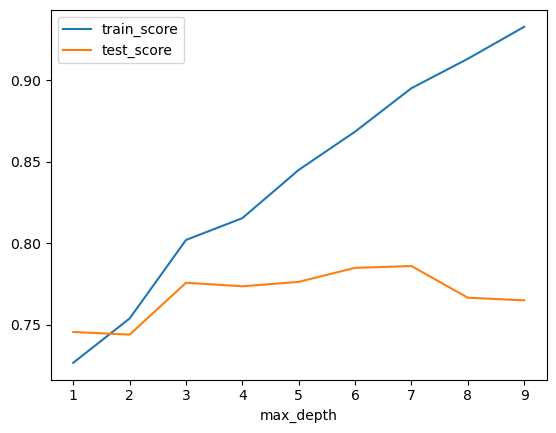

In [30]:
models_df.plot(x='max_depth')

### Apply best max_depth to Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
model.fit(X_train, y_train)
forest_score = model.score(X_train, y_train)
forest_test = model.score(X_test, y_test)
# print('Training Score',forest_score)
# print('Testing Score ',forest_test)
y_pred = model.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.7990301724137931


In [32]:
display(confusion_matrix(y_test, y_pred))

array([[719, 209],
       [164, 764]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       928
           1       0.79      0.82      0.80       928

    accuracy                           0.80      1856
   macro avg       0.80      0.80      0.80      1856
weighted avg       0.80      0.80      0.80      1856



### Use best estimators for max_depth

In [ ]:
models = {'train_score': [], 'test_score': [], 'n_estimators': []}

for n in [50, 100, 500, 1000]:
    models['n_estimators'].append(n)
    model = RandomForestClassifier(n_estimators=n, max_depth=7)
    model.fit(X_train_pca, y_train)
    y_test_pred = model.predict(X_test_pca)
    y_train_pred = model.predict(X_train_pca)

    models['train_score'].append(balanced_accuracy_score(y_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test, y_test_pred))

models_df = pd.DataFrame(models)

In [ ]:
models_df.plot(x='n_estimators')

## Confusioin Matrix (ADD!)

## K Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100, 500]
}
random_knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)

random_knn.fit(X_train_pca, y_train)

In [ ]:
y_pred = random_knn.predict(X_test_pca)
print(balanced_accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
classifier.score

### Confusion Matrix

## Cat Boost

In [34]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.2, loss_function='Logloss', eval_metric='Accuracy', random_seed=42, metric_period=100) 
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
accuracy = cv_results
average_accuracy = cv_results.mean()

print("Accuracy for each fold:", accuracy)
print("Average Accuracy across all folds:", average_accuracy)

0:	learn: 0.8052315	total: 147ms	remaining: 14.5s
99:	learn: 0.9201131	total: 334ms	remaining: 0us
0:	learn: 0.7937434	total: 3.25ms	remaining: 322ms
99:	learn: 0.9181690	total: 179ms	remaining: 0us
0:	learn: 0.7870272	total: 3.73ms	remaining: 369ms
99:	learn: 0.9172853	total: 210ms	remaining: 0us
0:	learn: 0.7898551	total: 1.99ms	remaining: 197ms
99:	learn: 0.9164016	total: 230ms	remaining: 0us
Accuracy for each fold: [0.90933192 0.90084836 0.89766702 0.90031813]
Average Accuracy across all folds: 0.9020413573700954


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       928
           1       0.79      0.82      0.80       928

    accuracy                           0.80      1856
   macro avg       0.80      0.80      0.80      1856
weighted avg       0.80      0.80      0.80      1856



In [ ]:
scores = cross_val_score(model,X_test,y_test,cv=50,scoring="recall")
scores

In [ ]:
print(classification_report(y_test, y_pred))

## XGBoost

XGBoost Classifier, Gradient Boosting Classifier, Gradient Boosting Classifier

### Graph showing comparision of scores
see link: https://www.kaggle.com/code/thomaskonstantin/analyzing-and-modeling-stroke-data Cell [20]